<a href="https://colab.research.google.com/github/Marionlauretnabeneza/per-residue-distance/blob/main/Selection_Icc_BACE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scanpy

In [ ]:
pip install we-get

In [ ]:
pip install you-get

In [ ]:
pip install plotly

In [ ]:
pip install mdtraj

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.9-cp310-cp310-linux_x86_64.whl size=7547325 sha256=7e62752232caa993ab43a6c75a65d530ec8eb7754f87330346ed11553bf976ba
  Stored in directory: /root/.cache/pip/wheels/4b/4e/d5/22b44e04aca0780281ffb43717ebb3404bc1a77cf8f345fa73
Successfully built mdtraj


In [ ]:
pip install biopython pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.8 MB/s eta 0:00:00


In [ ]:
pip install mdtraj pandas

In [ ]:
pip install pytest

In [ ]:
pip install mdtraj pandas requests

In [ ]:
pip install parmed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
pip install gemmi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp as sm
from scipy.stats import spearmanr
import scanpy as sc
import anndata
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import seaborn as sns
import mdtraj as md
import pandas as pd
import gemmi
import requests
from io import StringIO
import tempfile
import os
from tkinter import Tk, filedialog
import os
import shutil


1/ Données CSV from RSCB
filtered on
  1) Résolution
  2) Poids moléculaires
  3) Binding Affinity

In [ ]:
df = pd.read_csv(r"/content/(1)rcsb_pdb_custom_report.csv")
df.drop(df.index[:0], inplace=True)
# Remplacer les noms de colonnes par la première ligne
df.columns = df.iloc[0]

# Supprimer la première ligne qui contenait les anciens noms de colonnes
df = df[1:]

# Réindexer le DataFrame après la suppression de la première ligne
df.reset_index(drop=True, inplace=True)
df.set_index(df.columns[0], inplace=True)
df = df.dropna(subset=['Resolution (Å)'])
df.head(2)

,pH,DOI,Ligand,Value,Unit,PDB ID,Number of Water Molecules per Deposited Model,Number of Distinct Non-polymer Entities,Resolution (Å),Structure Determination Methodology,...,Structure Title,Source Organism,Gene Name,Molecular Weight (Entity),EC Number,Entity ID,Total Number of Polymer Residues per Assembly,Ligand MW,Ligand Name,NaN
Entry ID,,,,,,,,,,,,,,,,,,,,,
4K9H,6.8,10.1016/j.bmcl.2013.05.028,1QU,76,nM,4K9H,8,1,2.29,experimental,...,Bace-1 inhibitor complex,Homo sapiens,"BACE1, BACE, KIAA1149",43.256,3.4.23.46,1,388,610.666,"1-cyclopentyl-N-[(2S,3R)-3-hydroxy-1-phenyl-4-...",NaN
3IGB,5.4,10.1021/jm9006752,454,38000,nM,3IGB,114,1,2.238,experimental,...,Bace-1 with Compound 3,Homo sapiens,"BACE1, BACE, KIAA1149",46.441,3.4.23.46,1,415,290.362,"8,8-diphenyl-2,3,4,8-tetrahydroimidazo[1,5-a]p...",NaN


In [ ]:
df6=df.T
df6['5MCQ']

0
pH                                                                                             4.5
DOI                                                                    10.1016/j.ebiom.2017.09.004
Ligand                                                                                         NaN
Value                                                                                          NaN
Unit                                                                                           NaN
PDB ID                                                                                        5MCQ
Number of Water Molecules per Deposited Model                                                  586
Number of Distinct Non-polymer Entities                                                          1
Resolution (Å)                                                                                1.82
Structure Determination Methodology                                                   experimental
DOI     

In [ ]:
#1) extraire les données en fonction de leur résolution Å <2, WM,

# Convertir la colonne 'Resolution (Å)' en nombres
df['Resolution (Å)'] = pd.to_numeric(df['Resolution (Å)'], errors='coerce')
df['Ligand MW'] = pd.to_numeric(df['Ligand MW'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Number of Water Molecules per Deposited Model'] = pd.to_numeric(df['Number of Water Molecules per Deposited Model'])


dfseuil= df[['Resolution (Å)','Number of Water Molecules per Deposited Model']]
dfseuil.head()
dfseuil = dfseuil.dropna()

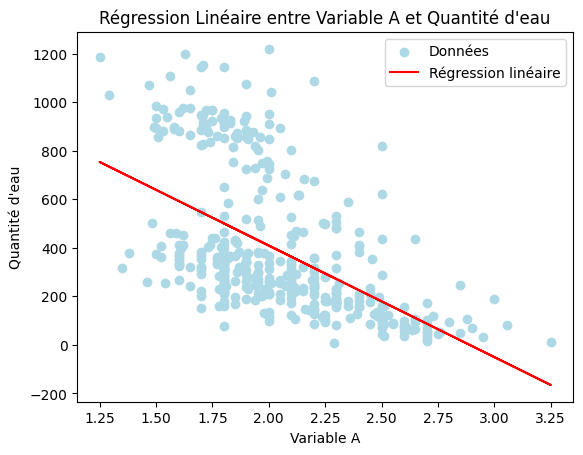

In [ ]:

dfseuil= df[['Resolution (Å)','Number of Water Molecules per Deposited Model']]
dfseuil.head()
dfseuil = dfseuil.dropna()
# Détermination du Seuil de résolution optimale par rapport au nombre de molécules d'eau
X = dfseuil[['Resolution (Å)']].values
y = dfseuil['Number of Water Molecules per Deposited Model'].values

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle aux données
model.fit(X, y)

# Prédire la quantité d'eau en fonction de la variable A
predictions = model.predict(X)

# Tracer le graphique de la régression linéaire
plt.scatter(X, y, color='lightblue', label='Données')
plt.plot(X, predictions, color='red', label='Régression linéaire')
plt.xlabel('Variable A')
plt.ylabel('Quantité d\'eau')
plt.title('Régression Linéaire entre Variable A et Quantité d\'eau')
plt.legend()
plt.show()

In [ ]:
len(df)

416

2) Sélectionné en fonction du pénalty

Parser en fonction des paramètres
  - df = total
  - Résolution : df1 = df[df['Resolution (Å)'] <= 2]
  - Poids moléculaires : df2 = df1[df1['Ligand MW'] >= 400]
  - Bindind valeur df3 = df2[(df2['Value'] >= 0) & (df2['Value'] <= 10)]

Grâce à cette liste, on va parser on va sélectionner les 10 échantillons, extraire les fichiers prm des complexes et obtenir une liste de ces échantillons classés selon la fréquence de pénalité la plus faible. Enfin on sélectionnera 5 des premiers éléments que l'on réorganisera selon leur poids moléuclaire le plus élevé. Pour finaliser la sélection, une analyse de la composition en résidus du ligand sera faite pour sélectionner le complexe qui aura la meilleure stabilité.

In [ ]:
# Filtrer les lignes où la colonne 'Resolution (Å)' est inférieure ou égale à 2
df1 = df[df['Resolution (Å)'] <= 2]
df2 = df1[df1['Ligand MW'] >= 400]
df3 = df2[(df2['Value'] >= 0) & (df2['Value'] <= 10)]
print(" on a"  ,len(df)," initialement")
print(" on a"  ,len(df1)," qui ont une résolution inférieure à 2Å")
print(" on a ",len(df2)," qui ont le poids moléculaire est supérieure ou égale à 400kDa")
print(" on a " ,len(df3), " qui ont une valeur de binding comprise entre 0 et 10")


 on a 416  initialement
 on a 228  qui ont une résolution inférieure à 2Å
 on a  98  qui ont le poids moléculaire est supérieure ou égale à 400kDa
 on a  27  qui ont une valeur de binding comprise entre 0 et 10


In [ ]:
df3.sort_values(by='Ligand MW', ascending=False)

,pH,DOI,Ligand,Value,Unit,PDB ID,Number of Water Molecules per Deposited Model,Number of Distinct Non-polymer Entities,Resolution (Å),Structure Determination Methodology,...,Structure Title,Source Organism,Gene Name,Molecular Weight (Entity),EC Number,Entity ID,Total Number of Polymer Residues per Assembly,Ligand MW,Ligand Name,NaN
Entry ID,,,,,,,,,,,,,,,,,,,,,
2IQG,NaN,10.1021/jm061242y,F2I,5.000,nM,2IQG,370.0,1,1.70,experimental,...,Crystal Structure of Hydroxyethyl Secondary Am...,Homo sapiens,"BACE1, BACE",45.445,3.4.23.46,1,406,677.564,"N'-{(1S,2R)-1-(3,5-DIFLUOROBENZYL)-2-HYDROXY-3...",NaN
4GID,6.5,10.1021/jm3008823,0GH,0.017,nM,4GID,1219.0,2,2.00,experimental,...,Structure of beta-secretase complexed with inh...,Homo sapiens,"BACE1, BACE, KIAA1149",43.256,3.4.23.46,1,388,665.843,"N-[(2S)-1-({(2S,3R)-3-hydroxy-1-[(2-methylprop...",NaN
2G94,6.5,10.1021/ja058636j,ZPQ,0.300,nM,2G94,853.0,1,1.86,experimental,...,Crystal structure of beta-secretase bound to a...,Homo sapiens,"BACE1, BACE",43.313,3.4.23.46,1,389,658.850,"N~2~-[(2R,4S,5S)-5-{[N-{[(3,5-DIMETHYL-1H-PYRA...",NaN
2QZL,7.5,10.1016/j.bmcl.2006.04.076,IXS,8.000,nM,2QZL,411.0,1,1.80,experimental,...,Crystal Structure of human Beta Secretase comp...,Homo sapiens,"BACE1, BACE",45.799,3.4.23.46,1,411,653.807,N-[(1S)-1-benzyl-2-{[(1S)-2-(isobutylamino)-1-...,NaN
2XFK,NaN,10.1016/j.bmcl.2010.05.111,AA9,3.000,nM,2XFK,361.0,1,1.80,experimental,...,"Human BACE-1 in complex with N-((1S,2R)-3-(((1...",Homo sapiens,NaN,43.761,3.4.23.46,1,392,649.843,"N-((1S,2R)-3-(((1S)-2-(CYCLOHEXYLAMINO)-1--MET...",NaN
2VNN,NaN,10.1021/jm800138h,CM7,2.000,nM,2VNN,382.0,1,1.87,experimental,...,"Human BACE-1 in complex with 7-ethyl-N-((1S,2R...",Homo sapiens,NaN,43.761,3.4.23.46,1,392,628.705,"N-[(1S,2R)-1-benzyl-2-hydroxy-3-{[3-(trifluoro...",NaN
3CIC,NaN,10.1016/j.bmcl.2008.04.050,316,3.000,nM,3CIC,969.0,2,1.75,experimental,...,Structure of BACE Bound to SCH709583,Homo sapiens,"BACE1, BACE",43.426,3.4.23.46,1,390,620.729,"N'-[(1S,2S)-2-[(2S)-4-benzyl-3-oxopiperazin-2-...",NaN
2VNM,NaN,10.1021/jm800138h,CM8,7.000,nM,2VNM,366.0,1,1.79,experimental,...,"Human BACE-1 in complex with 3-(1,1-dioxidotet...",Homo sapiens,NaN,43.761,3.4.23.46,1,392,618.710,"N-[(1S,2R)-1-benzyl-2-hydroxy-3-{[3-(trifluoro...",NaN
3CID,NaN,10.1016/j.bmcl.2008.04.050,318,5.000,nM,3CID,953.0,2,1.80,experimental,...,Structure of BACE Bound to SCH726222,Homo sapiens,"BACE1, BACE",43.426,3.4.23.46,1,390,606.703,"N'-[(1S,2S)-2-[(4S)-1-benzyl-5-oxoimidazolidin...",NaN


In [ ]:
# Liste des codes PDB
pdb_codes = df3.index

In [ ]:
element = "5MCQ"
if element in df2.index:
    print(f"L'élément {element} est présent dans la colonne d'index.")
else:
    print(f"L'élément {element} n'est pas présent dans la colonne d'index.")

L'élément 5MCQ n'est pas présent dans la colonne d'index.


LISTE des fichiers .prm en input

In [ ]:
liste_fichiers = ['/content/2IQG.prm',
                  '/content/2VNM.prm',
                  '/content/2VNN.prm',
                  '/content/2XFK.prm',
                  '/content/3CIC.prm',
                  '/content/3CID.prm',
                  '/content/4DI2.prm',
                  '/content/4GID.prm',
                  '/content/2G94.prm']
df3['prm_penalty %']=None

<ipython-input-53-f521d3d8ee9a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prm_penalty %']=None


TEST de calcul de la fréquence de pénalité

*   2IQG
*   Élément de liste



In [ ]:
# Chemin du fichier
chemin_fichier = '/content/2IQG.prm'

with open(chemin_fichier, 'r') as fichier:
      # Lire le contenu du fichier et stocker chaque ligne dans une liste
  lignes = fichier.readlines()

# Créer un DataFrame à partir de la liste de lignes
df5 = pd.DataFrame(lignes, columns=['Contenu'])

# Afficher le DataFrame
df5.head(4)

# Créer une colonne qui correspond au parsing du %penalty
df5['Nouvelle_Colonne'] = df5['Contenu'].str.extract(r' penalty= (.*)', expand=False)
df5['Nouvelle_Colonne'] = pd.to_numeric(df5['Nouvelle_Colonne'], errors='coerce')


# Calculer la fréquence de pénalty pour chaque complexe
Nb = 0
pen = 0

for i in df5['Nouvelle_Colonne']:
    if i >= 0:
        Nb = Nb + 1
    if i < 50:
        pen = pen + 1

# Éviter la division par zéro
if Nb != 0:
    Freq_penalty = pen / Nb
    print("Freq_penalty = ",Freq_penalty,"%")
else:
    print("/content/2IQG.prm}Division par zéro évitée. Nb est égal à zéro.")


Freq_penalty =  1.0 %


Calcule de la fréquence de pénalité pour chaque fichier.prm

In [ ]:
def calculer_freq_penalty(df_colonne):
    Nb = 0
    pen = 0

    for i in df_colonne:
        if i >= 0:
            Nb += 1

        # si somme des %pen >10 /Total %pen <20% on a un seuil de pénalité bas.
        if i > 10:
            pen += 1
    print(pen)
    # Éviter la division par zéro
    if Nb != 0:
        Freq_penalty = pen / Nb
        return Freq_penalty
    else:
        print("Division par zéro évitée. Nb est égal à zéro.")
        return 0  # Return 0 instead of None

def trouver_index_par_chemin(df, chemin):
    # Extraire le nom du fichier du chemin
    ID = chemin.split('/')[-1].split('.')[0]
    print(ID)

    # Trouver l'index correspondant au nom du fichier dans la colonne 'Nom_Fichier'
    index = df3.index[df3.index == ID].tolist()
    if index:
        return index[0]
    else:
        print(f"Le fichier {ID} n'a pas été trouvé dans la colonne 'Nom_Fichier' du DataFrame.")
        return None

# Chemin du fichier
chemin_fichier = liste_fichiers

# Initialiser une liste pour stocker les fréquences
freq_penalty_data = []

# Lire chaque fichier et calculer la fréquence de pénalité
for fichier in liste_fichiers:
    #Ouvrir le fichier.prm
    with open(fichier, 'r') as file:
        lignes = file.readlines()

    # Créer un DataFrame pour le fichier actuel : df_freq = fichier d'où l'on calcule la fréquence de pénalité du complexe
    df_freq = pd.DataFrame(lignes, columns=['Contenu'])
    df_freq['Nouvelle_Colonne'] = df_freq['Contenu'].str.extract(r' penalty= (.*)', expand=False)
    df_freq['Nouvelle_Colonne'] = pd.to_numeric(df_freq['Nouvelle_Colonne'], errors='coerce')
    df_freq['Nouvelle_Colonne'] = df_freq['Nouvelle_Colonne'].astype(float)

    # Calcul de la fréquence de penalty
    freq_penalty_result = calculer_freq_penalty(df_freq['Nouvelle_Colonne'])

    # Trouver l'index correspondant dans le DataFrame principal df
    index = trouver_index_par_chemin(df, fichier)

    if index is not None:
        if freq_penalty_result is not None:
            print(freq_penalty_result)
            # Ajouter les données de freq_penalty à la liste
            freq_penalty_data.append({'Nom_Fichier': index, 'Freq_Penalty': freq_penalty_result * 100})

            print(f"Fréquence Penalty pour {index} : {freq_penalty_result * 100}%")
        else:
            print("La fréquence de pénalité est None, ne pas ajouter à la liste.")



0
2IQG
0.0
Fréquence Penalty pour 2IQG : 0.0%
0
2VNM
0.0
Fréquence Penalty pour 2VNM : 0.0%
6
2VNN
0.11538461538461539
Fréquence Penalty pour 2VNN : 11.538461538461538%
3
2XFK
0.0967741935483871
Fréquence Penalty pour 2XFK : 9.67741935483871%
7
3CIC
0.14285714285714285
Fréquence Penalty pour 3CIC : 14.285714285714285%
29
3CID
0.42028985507246375
Fréquence Penalty pour 3CID : 42.028985507246375%
33
4DI2
0.4782608695652174
Fréquence Penalty pour 4DI2 : 47.82608695652174%
3
4GID
0.06976744186046512
Fréquence Penalty pour 4GID : 6.976744186046512%
11
2G94
0.3235294117647059
Fréquence Penalty pour 2G94 : 32.35294117647059%


<ipython-input-60-54dfd93e31f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[i, 'Freq_penalty'] = None
<ipython-input-60-54dfd93e31f1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Freq_penalty'] = pd.to_numeric(df4['Freq_penalty'], errors='coerce')
<ipython-input-60-54dfd93e31f1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

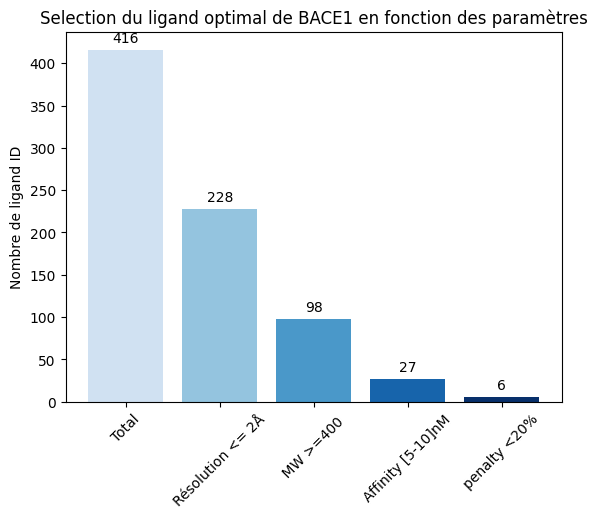

nombre Total= 416
nombre filtré pour Résolution <= 2Å= 228
nombre filtré pour MW >= 400= 98
nombre filtré pour Affinité [5-10]nM= 27
nombre filtré pour Penalty < 20%= 6
nombre filtré pour Top high MW 6
la sélection Top high MW est  Index(['2VNM', '3CIC', '2VNN', '2XFK', '4GID', '2IQG'], dtype='object', name='Entry ID')


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Filtrer les lignes où la colonne 'Resolution (Å)' est inférieure ou égale à 2
df1 = df[df['Resolution (Å)'] <= 2]
df2 = df1[df1['Ligand MW'] >= 400]
df3 = df2[(df2['Value'] >= 0) & (df2['Value'] <= 10)]
# Parseuer en fonction de la fréquence de pénalty
penalty = pd.DataFrame(freq_penalty_data)
penalty.set_index('Nom_Fichier', inplace=True)

for i in df3.index:
    if i in penalty.index:
        df3.loc[i, 'Freq_penalty'] = penalty.loc[i, 'Freq_Penalty']
    else:
        df3.loc[i, 'Freq_penalty'] = None

df4 = df3[(df3['Freq_penalty'] >= 0) & (df3['Freq_penalty'] <= 20)]

# Transformer la colonne 'Freq_penalty' en données numériques
df4['Freq_penalty'] = pd.to_numeric(df4['Freq_penalty'], errors='coerce')

# Assurez-vous que la colonne est de type numérique
df4['Freq_penalty'] = df4['Freq_penalty'].astype(float)

# Tri par ordre décroissant en fonction de 'Freq_penalty' et qui ont un poids moléculaire >500
df5 = df4.sort_values(by='Ligand MW', ascending=True)

# Créer un graphique à barres pour visualiser les variations de la longueur des DataFrames
noms_des_groupes = ['Total', 'Résolution <= 2Å',' MW >=400 ', 'Affinity [5-10]nM', 'penalty <20%']
valeurs_des_groupes = [len(df), len(df1),len(df2),len(df3),len(df4)]

fig, ax = plt.subplots()

# Utiliser une colormap de bleu
couleurs = cm.Blues([0.2, 0.4, 0.6, 0.8, 1.0,1,2])

# Ajouter les barres au graphique avec le dégradé de couleur bleu
bars = ax.bar(noms_des_groupes, valeurs_des_groupes, color=couleurs)

# Ajouter des valeurs au-dessus de chaque barre
for bar, valeur in zip(bars, valeurs_des_groupes):
    height = bar.get_height()
    ax.annotate(f'{valeur}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points de décalage vers le haut
                textcoords="offset points",
                ha='center', va='bottom')

# Mettre en diagonale les éléments de la légende
plt.xticks(rotation=45)

# Ajouter des titres et des labels
plt.title('Selection du ligand optimal de BACE1 en fonction des paramètres')
plt.ylabel('Nombre de ligand ID')

# Récupérer le chemin complet du bureau
bureau_path = os.path.join(os.path.expanduser("~"), "Desktop")

# Afficher le graphique
plt.show()

print('nombre Total=',len(df))
print('nombre filtré pour Résolution <= 2Å=',len(df1))
print('nombre filtré pour MW >= 400=',len(df2))
print('nombre filtré pour Affinité [5-10]nM=',len(df3))
print('nombre filtré pour Penalty < 20%=',len(df4))
print('nombre filtré pour Top high MW',len(df5))
print('la sélection Top high MW est ', df5.index)

In [71]:
# Spécifiez le chemin du fichier CSV
chemin_csv = "Top_selection_BACE1.csv"

# Exportez le DataFrame en fichier CSV
df5.to_csv(chemin_csv, index=False)

# Spécifiez le chemin de destination pour le téléchargement
chemin_destination = "/Content"

# Copiez simplement le fichier vers le chemin de destination
shutil.copy(chemin_csv, chemin_destination)
# Affichez un message indiquant que le fichier CSV a été créé et téléchargé
print(f"Le DataFrame a été exporté dans {chemin_csv}")
print(f"Le fichier a été copié vers {chemin_destination}")



Le DataFrame a été exporté dans Top_selection_BACE1.csv
Le fichier a été copié vers /Content
